<a href="https://colab.research.google.com/github/victorm0202/emed22/blob/main/12_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>
<center> Enero a junio 2022 <center>

# Logistic Regression 

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
# por esta ocasion, no pongo las graficas inline, para poder mostrarlas en un slide aparte...
#%matplotlib inline
plt.ioff() # pongo Interactive Mode Off
plt.style.use('seaborn') 

## Los datos

In [ ]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [ ]:
print( sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [ ]:
dta = sm.datasets.fair.load_pandas().data
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [ ]:
print(dta.describe())

       rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs  
count  6366.000000  6366.000000      6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.705374  
std       2.178003     0.942399         1.346435     2.203374  
min       9.000000     1.000000         1.000000     0.0000

## Construimos la variable dependiente (binaria)

In [ ]:
dta['affair'] = (dta['affairs'] > 0).astype(int)
dta['affair']

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: affair, Length: 6366, dtype: int64

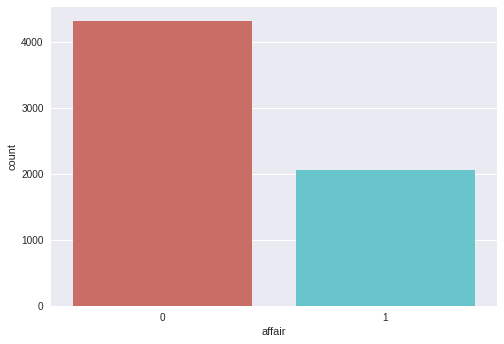

In [ ]:
sns.countplot(x='affair',data=dta, palette='hls')
plt.show()

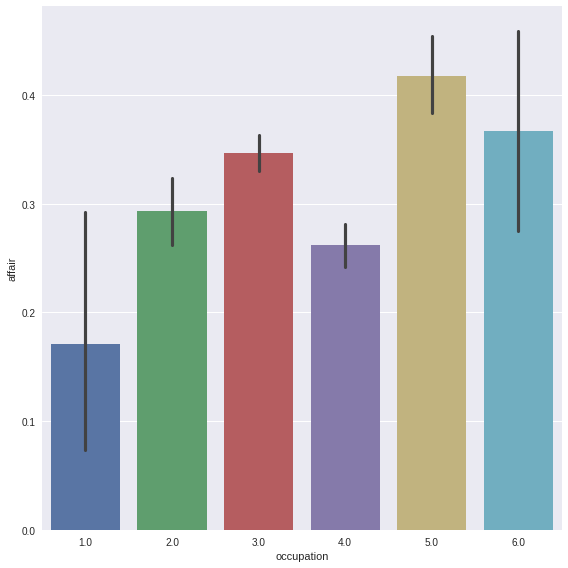

In [ ]:
sns.catplot(x="occupation", y="affair", data=dta, kind="bar", height = 8)
plt.show()

## El modelo de regresión logística

Hacemos una decodificación (one-hot encoding) de las variables categóricas mediante variables `dummy`

In [ ]:
data = dta
cat_vars = ['rate_marriage', 'religious','educ', 'occupation', 'occupation_husb']

# Una forma de hacerlo es mediante Pandas...
cat_dummy = pd.get_dummies(data['rate_marriage'], prefix='rate_marriage', drop_first=True)
cat_dummy

,rate_marriage_2.0,rate_marriage_3.0,rate_marriage_4.0,rate_marriage_5.0
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
6361,0,0,0,1
6362,0,0,1,0
6363,0,0,0,1
6364,0,0,0,1


Otra forma es mediante las estructuras de datos para modelos de `patsy`.

Recomendable para modelos estadísticos donde se usan matrices de diseño

In [ ]:
from patsy import dmatrices

data = dta
cat_vars = ['rate_marriage', 'religious','educ', 'occupation', 'occupation_husb']

y, X = dmatrices('affair ~ C(occupation) + C(educ) + C(occupation_husb)'
                 '+ C(rate_marriage) + age + yrs_married + children'
                 '+ C(religious)', data, return_type = 'dataframe')


In [ ]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(educ)[T.12.0],C(educ)[T.14.0],C(educ)[T.16.0],C(educ)[T.17.0],...,C(rate_marriage)[T.2.0],C(rate_marriage)[T.3.0],C(rate_marriage)[T.4.0],C(rate_marriage)[T.5.0],C(religious)[T.2.0],C(religious)[T.3.0],C(religious)[T.4.0],age,yrs_married,children
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,32.0,9.0,3.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0,13.0,3.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,2.5,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,37.0,16.5,4.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,32.0,13.0,2.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0,13.0,1.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,22.0,2.5,0.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,32.0,6.0,1.0


## Creamos conjunto de datos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, pd.Series.ravel(y), test_size=0.3, random_state=0)

## Regresión logística mediante un enfoque de modelos estadísticos

In [ ]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit(method='newton')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.540886
         Iterations 6
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.142      
Dependent Variable:    y                  AIC:                4872.3800  
Date:                  2022-04-06 13:41   BIC:                5038.8322  
No. Observations:      4456               Log-Likelihood:     -2410.2    
Df Model:              25                 LL-Null:            -2808.3    
Df Residuals:          4430               LLR p-value:        7.8883e-152
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        6.0000                                            
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                  0.2497   0.85

In [ ]:
y_pred1 = result.predict(X_test)
y_pred1 = [0 if x < 0.5 else 1 for x in y_pred1]

confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[1156  147]
 [ 369  238]]


# Métricas de evaluación.

## Clasificación binaria

La Exactitud (Accuracy) es simplemente la proporción de datos clasificados correctamente. 

\begin{align*}
    Accuracy = \frac{VP+VN}{TOTAL} 
\end{align*}

donde $VP$ es el número de predicciones positivas correctamente clasificadas, $VN$ es el número de predicciones negativas correctamente clasificadas y $TOTAL$ es el número total de casos u observaciones.

Es la primera métrica que se comprueba al evaluar un clasificador; sin embargo, si los datos están desbalanceados o si se está más interesado detectar una de las clases, la Exactitud no captura realmente la eficacia de un clasificador.

La precisión (Precision) nos ayuda a cuantificar la fracción de positivos verdaderos entre el total de los clasificados como positivos. Se utiliza principalmente para medir qué tan efectivo es el modelo en detectar la categoría de interés, es decir, la categoría positiva.

\begin{align*}
  Precision = \frac{VP}{VP+FP} 
\end{align*}

donde $FP$ es el número de predicciones positivas calificadas incorrectamente (falsos positivos). 
\end{frame}

La recuperación (Recall) mide cuántos positivos verdaderos se predijeron como positivos. 

\begin{align*}
    Recall = \frac{VP}{VP+FN} 
\end{align*}

donde $FN$ es el número de predicciones negativas calificadas incorrectamente.

Observa que mientras más cercano a 1 se encuentre el recall, más datos de la categoría real fueron bien clasificados. 

La medida F1 (F1 score) es la media armónica de la precisión y la recuperación (Recall). Esta medida es una buena forma de resumir la evaluación en un número único.

\begin{align*}
    F1 = 2\cdot \frac{precision \cdot recall}{precision + recall}
\end{align*}

Existe una relación entre la precisión y el recall: un modelo que predice todo como positivo tendrá un recall de 1, pero una precisión muy baja pues tendría muchos falsos positivos, mientras que un modelo que solo predijera un positivo y el resto negativos tendría un recall muy bajo, pero una precisión muy alta. 

Es por ello que se recurre a la medida F1, ya que mitiga el impacto de las tasas altas y acentúa el de las tasas bajas.

**Ponderación para clasificación multiclase**

- macro: this is a simple arithmetic mean of all metrics across classes. This technique gives equal weights to all classes making it a good option for balanced classification tasks.
- weighted: accounts for class imbalance by computing the average of binary metrics weighted by the number of samples of each class in the target. If 3 (precision scores) for 3 classes are: Class 1 (0.85), class 2 (0.80), and class 3 (0.89), the weighted average will be calculated by multiplying each score by the number of occurrences of each class and dividing by the total number of samples.
- micro: this is the same as accuracy. Micro-averaging is found by dividing the sum of the diagonal cells of the matrix by the sum of all the cells — i.e., accuracy. As accuracy is such a misleading metric, this averaging technique is rarely used.

In [ ]:
print(metrics.classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      1303
         1.0       0.62      0.39      0.48       607

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.71      0.73      0.71      1910



## Usando `sklearn`

In [ ]:
logreg = LogisticRegression(solver='newton-cg', C = 1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, solver='newton-cg')

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [ ]:
y_pred2 = logreg.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

[[1156  147]
 [ 369  238]]


In [ ]:
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      1303
         1.0       0.62      0.39      0.48       607

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.71      0.73      0.71      1910



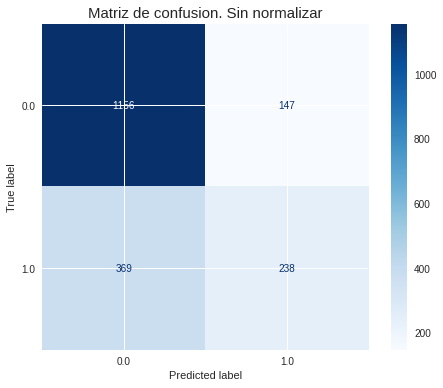

In [ ]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

In [ ]:
np.round(logreg.coef_,4)

array([[ 0.1249,  1.0383,  1.2665,  1.0714,  1.6463,  2.0136,  0.3753,
         0.6273,  0.3319,  0.5494,  0.2733,  0.0863,  0.2019,  0.0396,
         0.0062, -0.0144, -0.2886, -0.6063, -1.4842, -2.2724, -0.4057,
        -0.7049, -1.3248, -0.0583,  0.1105, -0.0146]])

# El tipo de enfoque que estaremos viendo nosotros...

In [ ]:
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


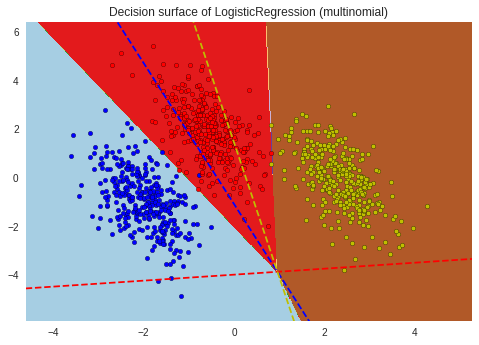

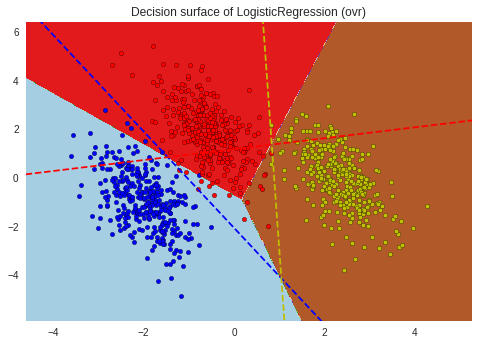

In [ ]:
plt.show()